In [1]:
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, \
    AveragePooling2D, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers

import numpy as np
from matplotlib import pyplot

import cv2
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def get_st_mod():
    md = Sequential()

    # CONV 1 & POOL 1
    md.add(Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding='same',
                  activation='relu',
                  input_shape=(224, 224, 3),
                  name='CONV_1'))  # -> 224, 224, 16
    md.add(MaxPooling2D(pool_size=2, strides=2,
                        name='POOL_1'))  # -> 112, 112, 16

    # CONV 2 & POOL 2
    md.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid',
                  activation='relu',
                  name='CONV_2'))  # -> 110, 110, 32
    md.add(MaxPooling2D(pool_size=2, strides=2,
                        name='POOL_2'))  # -> 55, 55, 32

    # CONV 3 & POOL 3
    md.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='valid',
                  activation='relu',
                  name='CONV_3'))  # -> 53, 53, 64
    md.add(MaxPooling2D(pool_size=2, strides=2,
                        name='POOL_3'))  # -> 26, 26, 64

    # CONV 4 & POOL 4
    md.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='valid',
                  activation='relu',
                  name='CONV_4'))  # -> 24, 24, 128
    md.add(MaxPooling2D(pool_size=2, strides=2,
                        name='POOL_4'))  # -> 12, 12, 128

    # CONV 5 & POOL 5
    md.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='valid',
                  activation='relu',
                  name='CONV_5'))  # -> 5, 5, 256
    md.add(MaxPooling2D(pool_size=2, strides=2,
                        name='POOL_5'))  # -> 3, 3, 256

    # CONV 6 & POOL 6
    md.add(Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='valid',
                  activation='relu',
                  name='CONV_6'))  # 1, 1, 512
    md.add(MaxPooling2D(pool_size=2, strides=2,
                        name='POOL_6'))  # -> 3, 3, 256

    # #FLATTEN
    # md.add(Flatten())

    # #FC 1
    # md.add(Dense(units=512, activation='relu',
    #              name='FC_1'))
    # Global Average Layer
    md.add(GlobalAveragePooling2D(name='GAP'))

    #SOFT_MAX
    md.add(Dense(units=2, activation='softmax',
                 name='CL_DET'))

    return md


model = get_st_mod()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV_1 (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
POOL_1 (MaxPooling2D)        (None, 112, 112, 16)      0         
_________________________________________________________________
CONV_2 (Conv2D)              (None, 110, 110, 32)      4640      
_________________________________________________________________
POOL_2 (MaxPooling2D)        (None, 55, 55, 32)        0         
_________________________________________________________________
CONV_3 (Conv2D)              (None, 53, 53, 64)        18496     
_________________________________________________________________
POOL_3 (MaxPooling2D)        (None, 26, 26, 64)        0         
_________________________________________________________________
CONV_4 (Conv2D)              (None, 24, 24, 128)       7

In [3]:
num_classes = 2


def load_data():
    x_data = []
    y_data = []

    source_file='micc_f220_classes.txt'
    source_dir='MICC-F220'

    with open(source_dir + '/' + source_file) as file_with_names:
        list_imgs = file_with_names.readlines()
    file_with_names.close()

    list_img_name_class = []
    for line in list_imgs:
        line = line[:-1]
        list_img_name_class.append((line.split('\t')[0], int(line.split('\t')[1])))

    for rec in list_img_name_class:
        x_data.append(cv2.imread(source_dir + '/resized/' + rec[0]))
        y_data.append(rec[1])

    source_file='micc_f600_classes.txt'
    source_dir='MICC-F600'

    with open(source_dir + '/' + source_file) as file_with_names:
        list_imgs = file_with_names.readlines()
    file_with_names.close()

    list_img_name_class = []
    for line in list_imgs:
        line = line[:-1]
        list_img_name_class.append((line.split('\t')[0], int(line.split('\t')[1])))

    for rec in list_img_name_class:
        x_data.append(cv2.imread(source_dir + '/resized/' + rec[0]))
        y_data.append(rec[1])

    source_file='micc_f2000_classes.txt'
    source_dir='MICC-F2000'

    with open(source_dir + '/' + source_file) as file_with_names:
        list_imgs = file_with_names.readlines()
    file_with_names.close()

    list_img_name_class = []
    for line in list_imgs:
        line = line[:-1]
        list_img_name_class.append((line.split('\t')[0], int(line.split('\t')[1])))

    for rec in list_img_name_class:
        x_data.append(cv2.imread(source_dir + '/resized/' + rec[0]))
        y_data.append(rec[1])

    x_data = np.array(x_data)
    y_data = np_utils.to_categorical(y_data, num_classes)
    return x_data, y_data

In [4]:
xx, yy = load_data()

xx = xx / 255.0

In [5]:
print(xx.shape)
print(yy.shape)

(2820, 224, 224, 3)
(2820, 2)


In [6]:
train_size = 0.9
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=test_size, random_state=13)

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

In [8]:
batch_size = 64
epochs = 50
model_file_path = 'MICC-F2000/test_6_micc_f220_f600_f2000.hdf5'

checkpointer = ModelCheckpoint(filepath=model_file_path, verpose=1,
                               save_best_only=True)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=2, shuffle=True,
                    callbacks=[checkpointer])

Epoch 1/50
40/40 - 10s - loss: 0.6611 - accuracy: 0.6351 - val_loss: 0.6406 - val_accuracy: 0.6596
Epoch 2/50
40/40 - 5s - loss: 0.6389 - accuracy: 0.6556 - val_loss: 0.6323 - val_accuracy: 0.6596
Epoch 3/50
40/40 - 5s - loss: 0.6206 - accuracy: 0.6556 - val_loss: 0.6527 - val_accuracy: 0.6596
Epoch 4/50
40/40 - 5s - loss: 0.5930 - accuracy: 0.6663 - val_loss: 0.5888 - val_accuracy: 0.6879
Epoch 5/50
40/40 - 5s - loss: 0.5572 - accuracy: 0.6986 - val_loss: 0.5415 - val_accuracy: 0.7305
Epoch 6/50
40/40 - 5s - loss: 0.5063 - accuracy: 0.7541 - val_loss: 0.5398 - val_accuracy: 0.7199
Epoch 7/50
40/40 - 5s - loss: 0.4538 - accuracy: 0.7833 - val_loss: 0.4691 - val_accuracy: 0.7518
Epoch 8/50
40/40 - 5s - loss: 0.3936 - accuracy: 0.8270 - val_loss: 0.3973 - val_accuracy: 0.8085
Epoch 9/50
40/40 - 5s - loss: 0.3261 - accuracy: 0.8629 - val_loss: 0.3557 - val_accuracy: 0.8688
Epoch 10/50
40/40 - 5s - loss: 0.2919 - accuracy: 0.8869 - val_loss: 0.3377 - val_accuracy: 0.8688
Epoch 11/50
40/40 

In [9]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Test result: %.3f loss: %.3f' % (scores[1] * 100, scores [0]))

3/3 [==============================] - 1s 54ms/step - loss: 0.2214 - accuracy: 0.9397
Test result: 93.972 loss: 0.221


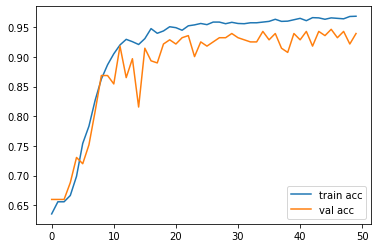

In [10]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

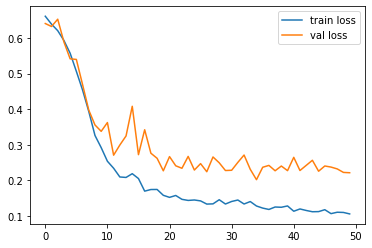

In [11]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [12]:
y_test_pred = model.predict(x_test)
confusion_matrix = tf.math.confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
print(confusion_matrix)

tf.Tensor(
[[174  12]
 [  5  91]], shape=(2, 2), dtype=int32)


In [ ]:
print(y_test)

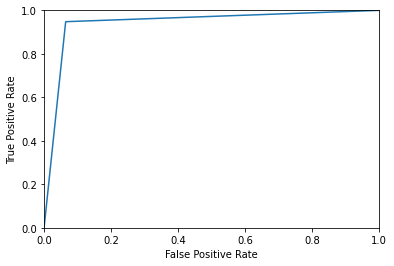

In [13]:
fpr_m, tpr_m, thresholds_m = roc_curve(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

plot_roc_curve (fpr_m, tpr_m)

In [15]:
def load_data_o(source_file='micc_f220_classes.txt', source_dir='MICC-F220'):
    with open(source_dir + '/' + source_file) as file_with_names:
        list_imgs = file_with_names.readlines()
    file_with_names.close()

    list_img_name_class = []
    for line in list_imgs:
        line = line[:-1]
        list_img_name_class.append((line.split('\t')[0], int(line.split('\t')[1])))

    x_data = []
    y_data = []
    for rec in list_img_name_class:
        x_data.append(cv2.imread(source_dir + '/resized/' + rec[0]))
        y_data.append(rec[1])

    x_data = np.array(x_data)
    y_data = np_utils.to_categorical(y_data, num_classes)
    return x_data, y_data

In [16]:
xx_f8, yy_f8 = load_data_o(source_file='micc_f8_names.txt', source_dir='MICC-F8multi')
xx_f8 = xx_f8 / 255.0

scores = model.evaluate(xx_f8, yy_f8, batch_size=128, verbose=1)
print('Test result: %.3f loss: %.3f' % (scores[1] * 100, scores [0]))

yy_f8_pred = model.predict(xx_f8)
confusion_matrix = tf.math.confusion_matrix(yy_f8.argmax(axis=1), yy_f8_pred.argmax(axis=1))
print(confusion_matrix)

1/1 [==============================] - 0s 192ms/step - loss: 7.1685 - accuracy: 0.2500
Test result: 25.000 loss: 7.169
tf.Tensor(
[[0 0]
 [6 2]], shape=(2, 2), dtype=int32)


In [18]:
xx_our, yy_our = load_data_o(source_file='our_test_classes.txt', source_dir='Our_test')
xx_our = xx_our / 255.0

scores = model.evaluate(xx_our, yy_our, batch_size=128, verbose=1)
print('Test result: %.3f loss: %.3f' % (scores[1] * 100, scores[0]))

yy_our_pred = model.predict(xx_our)
confusion_matrix = tf.math.confusion_matrix(yy_our.argmax(axis=1), yy_our_pred.argmax(axis=1))
print(confusion_matrix)

1/1 [==============================] - 0s 29ms/step - loss: 2.6099 - accuracy: 0.5000
Test result: 50.000 loss: 2.610
tf.Tensor(
[[4 0]
 [4 0]], shape=(2, 2), dtype=int32)
